In [ ]:
# Install RDKit.
%%capture
!pip install mordred
!pip install rdkit

In [ ]:
!pip uninstall -y numpy networkx


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: networkx 2.8.8
Uninstalling networkx-2.8.8:
  Successfully uninstalled networkx-2.8.8


In [ ]:
!pip install numpy==1.24.3 networkx==2.8.8 mordred


  Using cached networkx-2.8.8-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.9 MB/s eta 0:00:00
Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Lin

In [ ]:
from mordred import Calculator, descriptors
print("Mordred is working!")


Mordred is working!


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import mordred
from mordred import Calculator, descriptors
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")
from collections import Counter

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import mordred
from mordred import Calculator, descriptors
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")
from collections import Counter

In [ ]:
data_final = pd.read_excel('data_final.xlsx')
data_final.head()

,API_Name,API_SMILES,Coformer_Name,Coformer_SMILES,nAcid,nBase,SpAbs_A,VR1_A,nAromAtom,nHetero,...,VSA_EState1_COF,VSA_EState2_COF,VSA_EState7_COF,VSA_EState8_COF,VSA_EState9_COF,piPC8_COF,nHRing_COF,nARing_COF,SRW05_COF,Formation
0,Carbamazepine,C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N,Salicylic acid,C1=CC=C(C(=C1)C(=O)O)O,0,0,23.668756,96.738866,12,3,...,0.000000,10.261759,0.0,0.000000,0.000000,3.168897,0,0,0.0,1
1,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,sulfamethazine,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,0,0,26.599236,124.772245,12,7,...,26.551952,8.187598,0.0,3.547014,-3.694167,5.719492,1,0,0.0,0
2,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,2-fluorobenzoic acid,C1=CC=C(C(=C1)C(=O)O)F,0,0,29.232339,315.390232,12,8,...,12.459537,10.181759,0.0,0.000000,0.000000,3.168897,0,0,0.0,1
3,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,"2,5-dihydroxybenzoic acid",C1=CC(=C(C=C1O)C(=O)O)O,0,0,29.232339,315.390232,12,8,...,0.000000,10.302870,0.0,0.000000,0.000000,3.168897,0,0,0.0,1
4,Phenytoin,C1=CC=C(C=C1)C2(C(=O)NC(=O)N2)C3=CC=CC=C3,choline,C[N+](C)(C)CCO,0,0,25.111327,128.033748,12,4,...,0.843750,0.000000,0.0,1.114583,6.155417,0.000000,0,0,0.0,0


In [ ]:
data_final.shape

(586, 291)

In [ ]:
columns = ['API_Name', 'API_SMILES', 'Coformer_Name', 'Coformer_SMILES', 'Formation']
final_data = data_final[columns]

final_data.head()


,API_Name,API_SMILES,Coformer_Name,Coformer_SMILES,Formation
0,Carbamazepine,C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N,Salicylic acid,C1=CC=C(C(=C1)C(=O)O)O,1
1,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,sulfamethazine,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,0
2,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,2-fluorobenzoic acid,C1=CC=C(C(=C1)C(=O)O)F,1
3,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,"2,5-dihydroxybenzoic acid",C1=CC(=C(C=C1O)C(=O)O)O,1
4,Phenytoin,C1=CC=C(C=C1)C2(C(=O)NC(=O)N2)C3=CC=CC=C3,choline,C[N+](C)(C)CCO,0


In [ ]:
# Save the DataFrame to an Excel file
final_data.to_excel("final_data_May25.xlsx", index=False)

# Generating Molecular Objects

In [ ]:
# generate molecular objects of apis
mol_list = []

for smile in final_data['API_SMILES']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  AllChem.EmbedMolecule(mol)
  mol_list.append(mol)

data = pd.concat([final_data, pd.DataFrame(mol_list, columns = (['API_Mol']))], axis=1)

In [ ]:
# generate molecular objects of apis
mol_list = []

for smile in final_data['Coformer_SMILES']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  AllChem.EmbedMolecule(mol)
  mol_list.append(mol)

data = pd.concat([data, pd.DataFrame(mol_list, columns = (['Coformer_Mol']))], axis=1)

In [ ]:
data.head()

,API_Name,API_SMILES,Coformer_Name,Coformer_SMILES,Formation,API_Mol,Coformer_Mol
0,Carbamazepine,C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N,Salicylic acid,C1=CC=C(C(=C1)C(=O)O)O,1,<rdkit.Chem.rdchem.Mol object at 0x7b4d62bb9f50>,<rdkit.Chem.rdchem.Mol object at 0x7b4d62ade180>
1,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,sulfamethazine,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,0,<rdkit.Chem.rdchem.Mol object at 0x7b4d62bb9ee0>,<rdkit.Chem.rdchem.Mol object at 0x7b4d62ade1f0>
2,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,2-fluorobenzoic acid,C1=CC=C(C(=C1)C(=O)O)F,1,<rdkit.Chem.rdchem.Mol object at 0x7b4d62bb9fc0>,<rdkit.Chem.rdchem.Mol object at 0x7b4d62ade2d0>
3,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,"2,5-dihydroxybenzoic acid",C1=CC(=C(C=C1O)C(=O)O)O,1,<rdkit.Chem.rdchem.Mol object at 0x7b4d62bba030>,<rdkit.Chem.rdchem.Mol object at 0x7b4d62ade340>
4,Phenytoin,C1=CC=C(C=C1)C2(C(=O)NC(=O)N2)C3=CC=CC=C3,choline,C[N+](C)(C)CCO,0,<rdkit.Chem.rdchem.Mol object at 0x7b4d62bba0a0>,<rdkit.Chem.rdchem.Mol object at 0x7b4d62ade3b0>


# API SMILES Calculation & Data Cleaning



In [ ]:
# Creating a descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=False)

all_desc_api = calc.pandas(data['API_Mol'])

100%|██████████| 586/586 [03:46<00:00,  2.59it/s]


In [ ]:
#check null values
all_desc_api.isnull().sum().sum()

0

In [ ]:
#extract columns with numbers and boolean values
column_num = []
column_bool = []
for column in all_desc_api.columns:
  column_type = all_desc_api[column].dtype
  if column_type == 'object':
      pass
  elif column_type =='bool':
      column_bool.append(column)
  else:
      column_num.append(column)

In [ ]:
len(column_bool)

2

In [ ]:
#truncate dataset containing numbers and boolean values
all_desc_api = all_desc_api[column_num + column_bool]

In [ ]:
len(all_desc_api.columns)

1274

In [ ]:
#remove columns with low variance
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

all_desc_api = remove_low_variance(all_desc_api, threshold=0.2)

In [ ]:

# To calclulate  Correlation and remove highly  correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Dropping highly correlated Features
corr_features = correlation(all_desc_api, 0.80)
print("No. of features to drop : ",len(set(corr_features)))

all_desc_api.drop(corr_features,axis=1,inplace=True)

No. of features to drop :  542


In [ ]:
all_desc_api.shape

(586, 152)

# Coformer SMILES Calculation & Data Cleaning

In [ ]:
# Creating a descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=False)

all_desc_coformer = calc.pandas(data['Coformer_Mol'])

100%|██████████| 586/586 [01:46<00:00,  5.49it/s]


In [ ]:
all_desc_coformer.isnull().sum().sum()

0

In [ ]:
column_num = []
column_bool = []
for column in all_desc_coformer.columns:
  column_type = all_desc_coformer[column].dtype
  if column_type == 'object':
      pass
  elif column_type =='bool':
      column_bool.append(column)
  else:
      column_num.append(column)

In [ ]:
all_desc_coformer = all_desc_coformer[column_num + column_bool]

In [ ]:
len(all_desc_coformer.columns)

1171

In [ ]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

all_desc_coformer = remove_low_variance(all_desc_coformer, threshold=0.2)


In [ ]:
# Dropping highly correlated Features
corr_features = correlation(all_desc_coformer, 0.80)
print("No. of features to drop : ",len(set(corr_features)))


all_desc_coformer.drop(corr_features,axis=1,inplace=True)

No. of features to drop :  543


In [ ]:
len(all_desc_coformer.columns)

134

In [ ]:
all_desc_coformer.head()

,nAcid,nBase,SpAbs_A,SpDiam_A,nAromAtom,nN,nX,AATS0dv,AATS0Z,AATS1Z,...,EState_VSA8,VSA_EState1,VSA_EState2,VSA_EState7,VSA_EState8,VSA_EState9,piPC8,nHRing,nARing,SRW05
0,1,0,11.945822,4.534368,6,0,0,10.625000,28.125000,27.250000,...,0.000000,0.000000,10.261759,0.0,0.000000,0.000000,3.168897,0,0,0.0
1,0,0,22.551973,4.770959,12,4,0,8.316498,31.090909,34.205882,...,14.690052,26.551952,8.187598,0.0,3.547014,-3.694167,5.719492,1,0,0.0
2,1,0,11.945822,4.534368,6,0,1,12.933333,31.066667,28.933333,...,0.000000,12.459537,10.181759,0.0,0.000000,0.000000,3.168897,0,0,0.0
3,1,0,13.132593,4.610080,6,0,0,11.882353,30.235294,28.588235,...,0.000000,0.000000,10.302870,0.0,0.000000,0.000000,3.168897,0,0,0.0
4,0,1,6.720566,4.202006,0,1,0,2.476190,14.619048,16.900000,...,21.143016,0.843750,0.000000,0.0,1.114583,6.155417,0.000000,0,0,0.0


In [ ]:
# Renaming coformers descriptors to distinguish from api descriptors.
all_desc_coformer.columns = [name+'_COF' for name in all_desc_coformer.columns]

In [ ]:
all_desc_coformer.head()

,nAcid_COF,nBase_COF,SpAbs_A_COF,SpDiam_A_COF,nAromAtom_COF,nN_COF,nX_COF,AATS0dv_COF,AATS0Z_COF,AATS1Z_COF,...,EState_VSA8_COF,VSA_EState1_COF,VSA_EState2_COF,VSA_EState7_COF,VSA_EState8_COF,VSA_EState9_COF,piPC8_COF,nHRing_COF,nARing_COF,SRW05_COF
0,1,0,11.945822,4.534368,6,0,0,10.625000,28.125000,27.250000,...,0.000000,0.000000,10.261759,0.0,0.000000,0.000000,3.168897,0,0,0.0
1,0,0,22.551973,4.770959,12,4,0,8.316498,31.090909,34.205882,...,14.690052,26.551952,8.187598,0.0,3.547014,-3.694167,5.719492,1,0,0.0
2,1,0,11.945822,4.534368,6,0,1,12.933333,31.066667,28.933333,...,0.000000,12.459537,10.181759,0.0,0.000000,0.000000,3.168897,0,0,0.0
3,1,0,13.132593,4.610080,6,0,0,11.882353,30.235294,28.588235,...,0.000000,0.000000,10.302870,0.0,0.000000,0.000000,3.168897,0,0,0.0
4,0,1,6.720566,4.202006,0,1,0,2.476190,14.619048,16.900000,...,21.143016,0.843750,0.000000,0.0,1.114583,6.155417,0.000000,0,0,0.0


In [ ]:
# concatenate api & coformer descriptors & add target (formation)
df_final = pd.concat([all_desc_api, all_desc_coformer, data['Formation']], axis=1)

In [ ]:
df_final.head()

,nAcid,nBase,SpAbs_A,VR1_A,nAromAtom,nHetero,nN,nO,nS,nF,...,VSA_EState1_COF,VSA_EState2_COF,VSA_EState7_COF,VSA_EState8_COF,VSA_EState9_COF,piPC8_COF,nHRing_COF,nARing_COF,SRW05_COF,Formation
0,0,0,23.668756,96.738866,12,3,2,1,0,0,...,0.000000,10.261759,0.0,0.000000,0.000000,3.168897,0,0,0.0,1
1,0,0,26.599236,124.772245,12,7,4,3,0,0,...,26.551952,8.187598,0.0,3.547014,-3.694167,5.719492,1,0,0.0,0
2,0,0,29.232339,315.390232,12,8,3,4,1,0,...,12.459537,10.181759,0.0,0.000000,0.000000,3.168897,0,0,0.0,1
3,0,0,29.232339,315.390232,12,8,3,4,1,0,...,0.000000,10.302870,0.0,0.000000,0.000000,3.168897,0,0,0.0,1
4,0,0,25.111327,128.033748,12,4,2,2,0,0,...,0.843750,0.000000,0.0,1.114583,6.155417,0.000000,0,0,0.0,0


In [ ]:
all_columns = df_final.columns.tolist()

columns_df = pd.DataFrame(all_columns, columns=["Column Names"])

columns_df.to_excel("RF_descriptors.xlsx", index=False)


# Model Training & Testing


In [ ]:
#define variables
y = df_final['Formation']
X = df_final.iloc[:,:-1]

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#generate random forest model
rf = RandomForestClassifier(random_state=26)
rf.fit(X_train, y_train)
print(f'The accuracy for train set is {rf.score(X_train, y_train)}')
print(f'The accuracy for test set is {rf.score(X_test, y_test)}')

The accuracy for train set is 1.0
The accuracy for test set is 0.9067796610169492


# Statistical Analysis & Validation

In [ ]:
cv_rf_if = cross_val_score(rf, X_train, y_train, cv=10)
cv_rf_if.mean()

0.8630897317298798

In [ ]:
# Calculate recall scores using cross-validation
recall_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='recall')

average_recall = recall_scores.mean()
print("Average Recall Score:", average_recall)

# Calculate precision scores using cross-validation
precision_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='precision')

average_precision = precision_scores.mean()
print("Average Precision Score:", average_precision)

# Calculate F-1 scores using cross-validation
F1_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')

average_f1 = F1_scores.mean()
print("Average F_l Score:", average_f1)


Average Recall Score: 0.8576086956521738
Average Precision Score: 0.8744288537549408
Average F_l Score: 0.8635840645231265


**Confusion Matrix**

In [ ]:
Y_pred = rf.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
confusion_matrix(y_test, Y_pred)

array([[58,  6],
       [ 5, 49]])

**Classification Report**

In [ ]:
print(classification_report(Y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.91      0.89      0.90        55

    accuracy                           0.91       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118



ROC curve & AUC

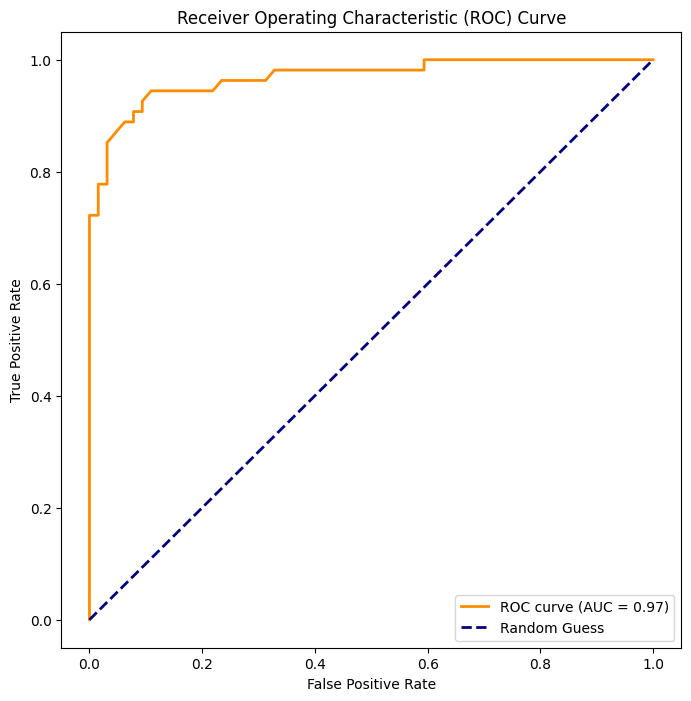

In [ ]:
y_scores = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Training & Testing Model with Imoprtant Descriptors

In [ ]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
dicts = {
    'Descriptors':[x for x in df_final.iloc[:,:-1].columns],
    'Importance':importance
    }
DF_imp = pd.DataFrame(dicts)
DF_imp = DF_imp.sort_values('Importance',ascending=True)
DF_imp.to_excel('impa.xlsx', index=None)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AATS0dv_COF'),
  Text(1, 0, 'PEOE_VSA8'),
  Text(2, 0, 'VR1_A'),
  Text(3, 0, 'ATSC6i'),
  Text(4, 0, 'ATSC1v_COF'),
  Text(5, 0, 'ATSC3d'),
  Text(6, 0, 'ATSC2d'),
  Text(7, 0, 'SpAbs_A'),
  Text(8, 0, 'EState_VSA7'),
  Text(9, 0, 'AATS0Z_COF')])

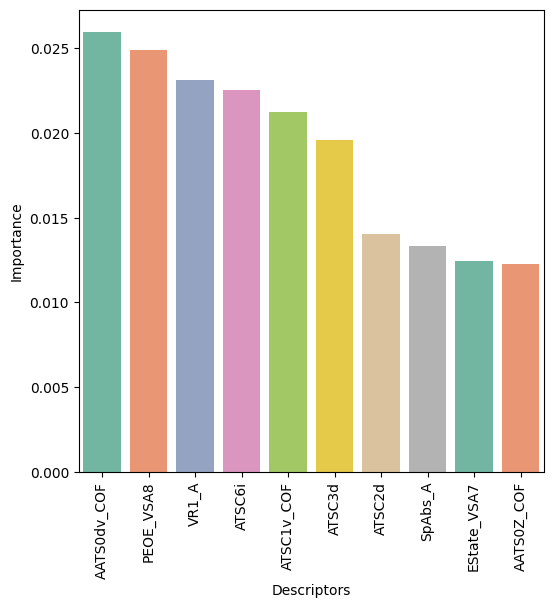

In [ ]:

# get importance
importance = rf.feature_importances_
# summarize feature importance
dicts = {
    'Descriptors':[x for x in df_final.iloc[:,:-1].columns],
    'Importance':importance
    }
DF_imp = pd.DataFrame(dicts)
DF_imp = DF_imp.sort_values('Importance',ascending=False)
DF_imp.to_excel('imp.xlsx', index=None)

# plot feature importance
top_desc_fi = DF_imp[:10]
plt.subplots(figsize=(6,6))
sns.barplot(data=top_desc_fi, x = 'Descriptors', y='Importance', palette = 'Set2')
# plt.bar('Feature','Importance',data = DF_imp.iloc[:7,:])
plt.xticks(rotation = 90)
# plt.show()
# plt.savefig('fi.png', dpi=300, bbox_inches='tight')


# RF Model with Reduced Descriptors

In [ ]:
#top 100 descriptors
DF_imp['Descriptors'][:100]

,Descriptors
159,AATS0dv_COF
112,PEOE_VSA8
3,VR1_A
59,ATSC6i
190,ATSC1v_COF
26,ATSC3d
25,ATSC2d
2,SpAbs_A
134,EState_VSA7
160,AATS0Z_COF


In [ ]:
# get the dataset with only top 100 descriptors
df_final_red = df_final[DF_imp['Descriptors'][:100]]

In [ ]:
df_final_red.head()

,AATS0dv_COF,PEOE_VSA8,VR1_A,ATSC6i,ATSC1v_COF,ATSC3d,ATSC2d,SpAbs_A,EState_VSA7,AATS0Z_COF,...,ATSC6s,ATSC4d_COF,AATSC2s_COF,ATSC2i,ATSC3p_COF,SaasC_COF,EState_VSA6_COF,ATSC7i,AATSC0i_COF,BCUTi-1h_COF
0,10.625000,0.000000,96.738866,-9.036267,97.162264,-2.088889,2.226667,23.668756,60.682977,28.125000,...,-28.234568,-3.468750,0.699804,1.824976,-1.839451,-0.266204,12.132734,10.274258,1.352953,13.642663
1,8.316498,18.181117,124.772245,-31.910783,79.623912,-10.848126,4.376068,26.599236,12.132734,31.090909,...,-18.408686,-2.702479,0.767460,36.785833,-3.236852,2.074441,19.913841,4.236896,1.716741,14.559182
2,12.933333,18.807967,315.390232,-7.780229,51.270336,-12.312500,2.125000,29.232339,0.000000,31.066667,...,-34.563572,-2.222222,0.637778,13.506009,-1.648590,-0.988426,0.000000,11.206825,2.831499,17.424769
3,11.882353,18.807967,315.390232,-7.780229,146.631857,-12.312500,2.125000,29.232339,0.000000,30.235294,...,-34.563572,-5.498270,0.640331,13.506009,-2.229217,-0.832870,0.000000,11.206825,1.333118,13.642798
4,2.476190,0.000000,128.033748,-2.069199,-241.530786,-7.977107,1.434964,25.111327,60.663671,14.619048,...,-27.336036,0.884354,0.005634,0.240532,-4.652379,0.000000,0.000000,3.837560,1.082015,14.548202


In [ ]:
# concatenate api & coformer descriptors & add target (formation)
df_final = pd.concat([data['Formation']], axis=1)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(df_final_red, y, test_size=0.20, random_state=42)

In [ ]:
#model building
rf = RandomForestClassifier(random_state=98)
rf.fit(X_train, y_train)
print(f'The accuracy for train set is {rf.score(X_train, y_train)}')
print(f'The accuracy for test set is {rf.score(X_test, y_test)}')

The accuracy for train set is 1.0
The accuracy for test set is 0.8813559322033898


In [ ]:
cv_rf_if = cross_val_score(rf, X_train, y_train, cv=10)
cv_rf_if.mean()

0.875763182238668

In [ ]:
#import pickle
#with open('scalernov.pkl', 'wb') as f:
 #   pickle.dump(scaler, f)
#with open('model_rf_now', 'wb') as f:
 #   pickle.dump(rf, f)

In [ ]:
#X.columns

In [ ]:
# Calculate recall scores using cross-validation
recall_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='recall')

average_recall = recall_scores.mean()
print("Average Recall Score:", average_recall)

# Calculate precision scores using cross-validation
precision_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='precision')

average_precision = precision_scores.mean()
print("Average Precision Score:", average_precision)

# Calculate F-1 scores using cross-validation
F1_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')

average_f1 = F1_scores.mean()
print("Average F_l Score:", average_f1)


Average Recall Score: 0.8576086956521738
Average Precision Score: 0.8970770019454231
Average F_l Score: 0.8751031978482076


In [ ]:
Y_pred_if = rf.predict(X_test)
Y_pred_if

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
confusion_matrix(y_test, Y_pred_if)

array([[56,  8],
       [ 6, 48]])

In [ ]:
print(classification_report(Y_pred_if, y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        62
           1       0.89      0.86      0.87        56

    accuracy                           0.88       118
   macro avg       0.88      0.88      0.88       118
weighted avg       0.88      0.88      0.88       118



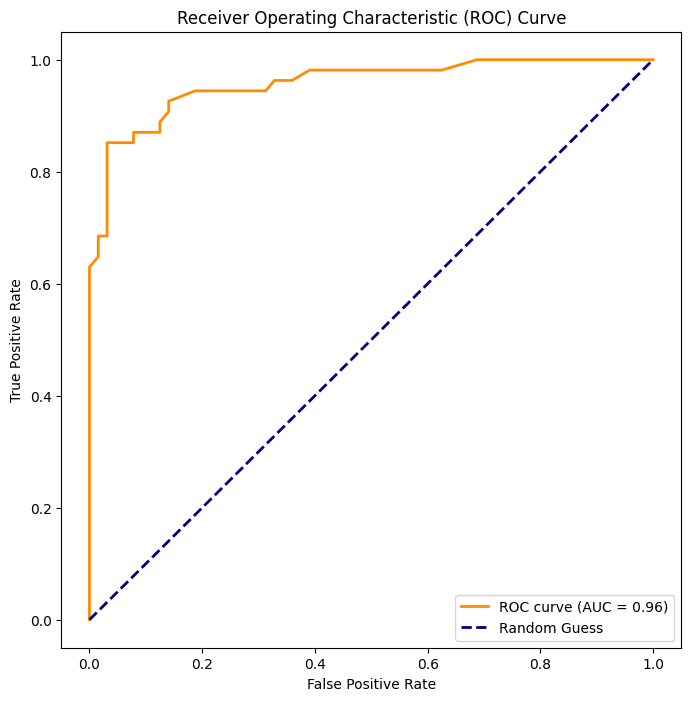

In [ ]:
y_scores = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
X_train.shape

(468, 100)